Métodos determinísticos locales no derivativos
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Definición del problema

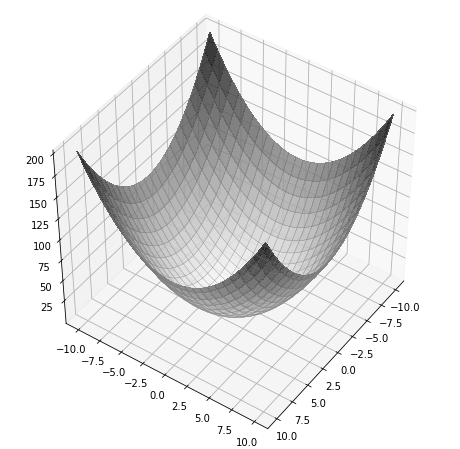

In [2]:
from plots import plot_contour, plot_surface
from testfunctions import sphere as fn

#
# Se desea encontrar el punto de mínima de la función
# esferica de dos dimensiones. El punto de mínima es
# f(0, 0) = 0. La región de busqueda es
#
#    -10 < x, y < 10
#
plot_surface(
    fn,
    x_bounds=[(-10, 10)] * 2,
)

## Búsqueda por coordenadas cíclicas

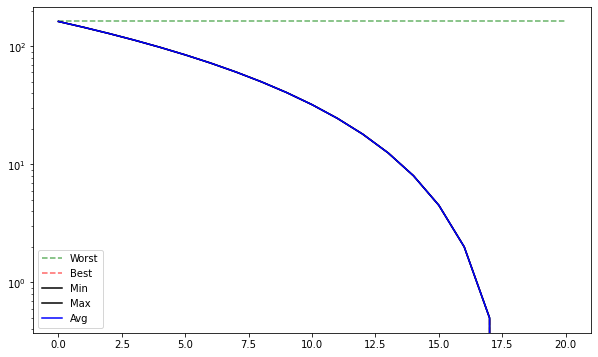

In [3]:
#
# Crea una instancia del evaluador que permite evaluar la
# función de rosenbrock para cada elemento de la muestra
# de soluciones
#
from fnevaluator import FnEvaluator

evaluator = FnEvaluator(fn)

#
# Se crea una instancia del geneador para crear poblaciones
# de una sola solución.
#
from generators import RandomUniform

monte_carlo = RandomUniform(
    pop_size=1,
    low=[9.0, 10.0],
    high=[9.0, 10.0],
)

#
# Se instancia un objeto para computar las estadísticas de
# la corrida
#
from stats import Statistics

stats = Statistics()

#
# Genera una población de una sola solución
#
solutions = monte_carlo()
solutions[0].x = np.array([9.0, 9.0])

#
# Crea una instancia del optimizador
#
from coordinatesearch import CoordinateSearch

optimizer = CoordinateSearch(
    fn=fn,
    delta=0.5,
)

#
# Evalua la muestra aleatoria
#
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

In [4]:
stats.min

[162.0,
 144.5,
 128.0,
 112.5,
 98.0,
 84.5,
 72.0,
 60.5,
 50.0,
 40.5,
 32.0,
 24.5,
 18.0,
 12.5,
 8.0,
 4.5,
 2.0,
 0.5,
 0.0,
 0.0,
 0.0]

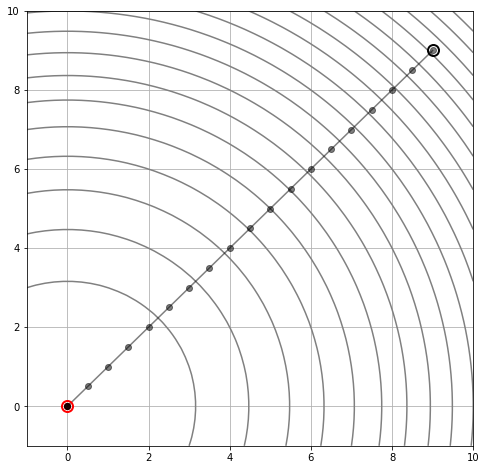

In [5]:
from plots import plot_trayectory

plot_trayectory(stats, fn, x_bounds=[(-1, 10)] * 2, minimum=[(0, 0)])

## Genetización del método de coordenadas cíclicas (equivalente a reiniciar)

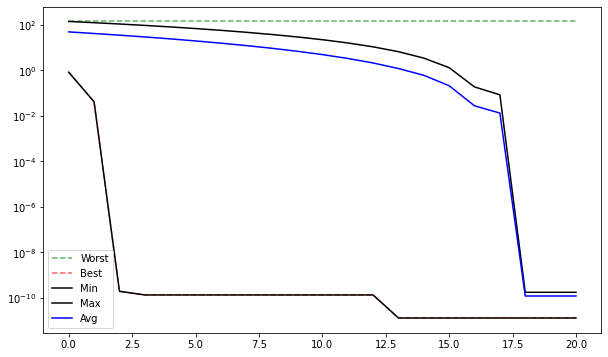

In [6]:
#
# Inicializa los operadores
#
stats = Statistics()

POPSIZE = 10
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-10, -10],
    high=[10, 10],
)

optimizer = CoordinateSearch(
    fn=fn,
    delta=0.5,
)

#
# Algoritmo
#
solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

In [7]:
stats.x_opt, stats.fn_opt

(array([0.5985785 , 0.67570217]), 0.8148696425706747)

## Búsqueda Local

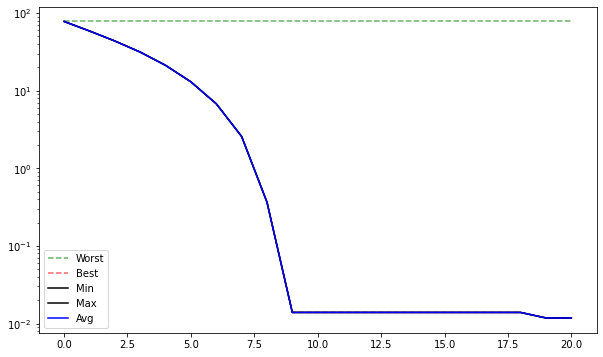

In [8]:
#
# Genera una población de una sola solución
#
monte_carlo = RandomUniform(
    pop_size=1,
    low=[-10, -10],
    high=[10, 10],
)
solutions = monte_carlo()
solutions[0].x = np.array([9, 9])

# Evaluador
stats = Statistics()

#  Optimizador
from localsearch import LocalSearch

optimizer = LocalSearch(
    fn=fn,
    delta0=0.5,
    reduction_factor=0.9,
)

#
# Algoritmo
#
solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

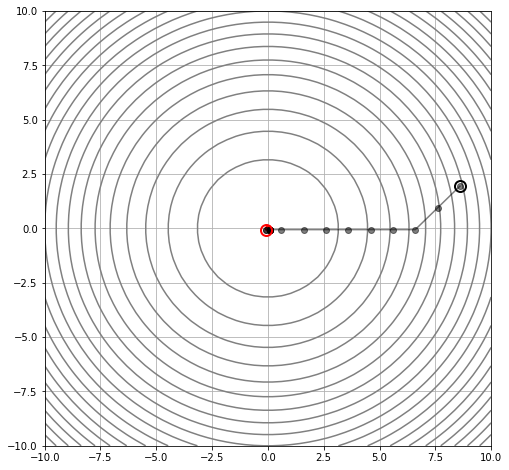

In [9]:
#
# Trayectoria del punto inicial al punto final
#
plot_trayectory(stats, fn, x_bounds=[(-10, 10)] * 2, minimum=[(0, 0)])

## Genetización del método de búsqueda local (equivalente a reiniciar)

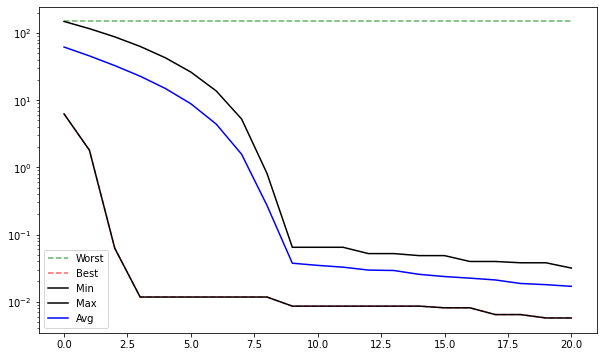

In [10]:
#
# Inicializa los operadores
#
stats = Statistics()

POPSIZE = 10
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-10, -10],
    high=[10, 10],
)

optimizer = LocalSearch(
    fn=fn,
    delta0=0.5,
    reduction_factor=0.9,
)

#
# Algoritmo
#
solutions = monte_carlo()
solutions = evaluator(solutions)
stats(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.plot()

In [11]:
stats.x_opt, stats.fn_opt

(array([2.46717498, 0.3968294 ]), 6.244425965334752)